# Data Exploration

Contents:

- Overview of Data Exploration
- Summary statistics
- Visualization for Data Exploration

## Overview of Data Exploration

The goal of the data exploration is to *learn* the data. This means that the data scientist must understand the structure of the available data as well as the values of the data. At the end, the data scientist knows the basic characteristics of the data, e.g., the structure, the size, the completeness (or rather where data is missing), and the relationships between different parts of the data. 

There are many methods for data exploration. The exploration is usually a semi-automated interactive process in which data scientists use many different tools to consider different aspects of the data. The first element of the toolbox of a data scientist are simple text editors and command line tools like head, more, and less. These tools allow the data scientist to inspect the non-binary raw data, e.g., comma-separated values (CSV):

In [1]:
!head 03_Data-Exploration.ipynb

{
 "cells": [
  {
   "cell_type": "markdown",
   "metadata": {},
   "source": [
    "# Data Exploration\n",
    "\n",
    "Contents:\n",
    "\n",


From this, we learn that the ipynb format used by Jupyter notebooks uses the [JavaScript Object Notation (JSON)](https://www.json.org/) to store data as a list of cells, that have a type, metadata, and associated source code. Without any additional tools, just through the simple head command that list the first lines of a text file.

> **Note:**
>
> You can run any shell command (e.g., bash) if you prefix the name with an exclamation mark directly from a Jupyter Notebook. Thus, `!head` in a Jupyter Notebook is the same as typing `head` in the command line. Whether this works or not depends on the command line. Since the standard command line of Windows does not have a `head` command, this may not work. 

Of course, this is not the only why to learn about how the data stored by Jupyter Notebooks. It is also not clear if all information (e.g., allowed fields) is visible, because the current file may not use all possible features of the ipynb format. Therefore, it is also important to look at the metadata, in this case the [description of the format](https://nbformat.readthedocs.io/en/latest/format_description.html). This is much more detailed and contains all aspects of the format. 

The metadata is not only restricted to file formats, but also other aspects, e.g., where data in a column of a relation database comes from (i.e., the source of the data), where related information may be found, and other useful information about the data. What the metadata does not contain (except maybe example values) is information about the values in your dataset. However, learning about these values is also vital to understand how a good model for your use case, based on the data, may look like. In the following, we look at two commonly used methods for learning about the values of data, i.e., summary statistics and visualizations. 

## Descriptive Statistics

*Descriptive* statistics try to summarize data in single values that describe properties of the data. This is not to be mixed up with *inductive* statistics, that allows the prediction of properties of the data. Consequently, you cannot use descriptive statistics to create reliable forecasts of the data. 

Within this chapter, we cover the following descriptive statistics:

- The *central tendency* of data, described by the *arithmetic mean*, *median*, or *mode*.
- The *variability* of the data, described by the *standard deviation* or *interquartile range*. 
- The *range* of the data, described by the *min* and *max* value.

There are also other descriptive statistics for the properties above, that we do not discuss in this chapter, e.g., the *trimmed mean* and the *harmonic mean* for the central tendency, or the *median absolute deviation of the median* for the variability. Moreover, there are also descriptive statistics for other properties of the data, e.g., for the *shape* (kurtosis, skewness). However, these are out of scope of this chapter and you can mostly do without them, especially if you combine descriptive statistics with visualizations. 

We use the notation $x = {x_1, ..., x_n}$ with $x_1, ..., x_n \in \mathbb{R}$ in this section. This means that $x$ is a set of real valued numbers. If $x$ is only a subset of all possibly data, $x$ is called a *sample*. 

### Central Tendency

The central tendency of data is a statistical marker that should be for a *typical value* in the center of the data, i.e., in the middle. This does not mean that many data points will have that exact value. Instead, the central tendency marks the "middle" of the data, i.e., it central location. For comparison, consider cities. They also have a center, which is typically somewhere in the middle of the city. 

There are different ways to measure the central tendency of the data. The *arithmetic mean* is defined as 
$$mean(x) = \frac{1}{n}\sum_{i=1}^{n} x_i, x_i \in \mathbb{R}.$$

The arithmetic mean can also easily be described in the natural language. It is the sum of all values divided by the number of values. The arithmetic mean is a good choice to describe the central tendency of data that follows a normal or a uniform distribution. In general, the arithmetic mean works reasonable well as long as the data is 1) without "holes, i.e., without large intermittent regions without values, including outliers, and 2) the is symmetric around the the arithmetic mean, i.e., the *spread* of the data on the left and the right side of the mean is similar. Thus, the arithmetic mean only works well is assumptions on the distribution of the data are met. Statistical methods that make such assumptions are called *parametric* statistics and may be misleading in case the assumptions are not fulfilled. We will show examples that demonstrate how the mean value can be misleading through [Anscombe's quartet](#anscombe's-quartet).

An alternative to the mean value is the *median* which is defined as
$$median(x) = \cases{\bar{x}_{m+1} & if $n$ is odd with $m=\frac{n+1}{2}$ \\ \frac{1}{2}(\bar{x}_{m}+\bar{x}_{m+1}) & if $n$ is even with $m=\frac{n}{2}$}$$

where $\bar{x}$ are the values of $x$ sorted by their size. Thus, the median is the middle value in the data: 50% of the data is less than or equal to the median, 50% of the median is greater than or equal to the median. The median is a *non-parametric* statistic, i.e., the median works for any distribution of data. Thus, the median can be used instead of the arithmetic mean if the assumptions on the distribution for the arithmetic mean to be meaningful are not met. 

What it means that the median is more robust than the median can be shown using a simple example. Consider the arithmetic mean and median of the following data, that fulfills the assumption of the arithmetic mean:

In [2]:
import statistics  # we use the statistics from the Python standard library

data = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

print('mean:  ', statistics.mean(data))
print('median:', statistics.median(data))

mean:   7.500909090909091
median: 7.58


Both values are relatively similar, both represent the central tendency of the data well. Now we add a single very large outlier to the data.

In [3]:
data.append(100)
print('mean:  ', statistics.mean(data))
print('median:', statistics.median(data))

mean:   15.209166666666667
median: 7.81


The arithmetic mean is now a lot higher and actually larger than all but one data point. This is not a good representation of the central tendency of the data. The median did not change a lot and remains almost the same. This is because the median only skips to the next sorted value, which is robust against such outliers. 

You might ask yourself why you should use the arithmetic mean at all, if the median is apparently superior because it is more robust. The biggest reason for this comes from stochastics: the arithmetic mean is closely related to the expected value of random variables. Moreover, the normal distribution can be fully described by the mean value and the standard deviation. Thus, for normally distributed data, the mean value is actually the perfect estimate for the central tendency. Regardless, if you are unsure about the distribution of the data and fear that there might by outliers, it is saver to use the median instead of the arithmetic mean. 

The arithmetic mean and the median can only be used for numeric data. However, what if you have, e.g., data about cloth sizes? These are not numeric values, but rather something like "small", "medium", and "large". Such data is categorical data and further discussed in Chapter 4. The *mode* can be used to calculate the central tendency of such data. The mode is defined as
the value that occurs most often in a sample $x$.

In [4]:
data = ['small', 'medium', 'small', 'large', 'large', 'medium', 'medium']
print('mode:', statistics.mode(data))

mode: medium


Please note that while the mode may work well for categorical data or discrete numeric data, it can also be misleading if the data is *bimodal* or *multimodal*, i.e., data where multiple values are all occurring frequently. The extreme case would be data where the categories are uniformly distributed. Because each category is equally likely, the mode would be completely random. Moreover, the mode does not work for continuous numeric data, because here it is very unlikely that the same value occurs twice. 

### Variability

The variability measures how far the data is spread out. A small variability means that most data is close to the central tendency of the data. A high variability means that the data is spread out over a large range. 

The most common measure for the variability is the *standard deviation*, which is defined as
$$sd(x) = \sqrt{\frac{\sum_{i=1}^n |x_i-mean(x)|}{n-1}}.$$

The standard deviation is the square root of the arithmetic mean of the difference from the arithmetic mean, except that the division is by $n-1$ instead of $n$. This is due to something called *degrees of freedom*, which we do not discuss here further. Thus, the standard deviation tells us how much deviation from the mean value we can expect. The standard deviation works well as a measure for the variability, when the mean value is a suitable representation for the central tendency. This means that the standard deviation is also a *parametric* measure for the variability, that can also be misleading.

Same as the median is the non-parametric counterpart to the arithmetic mean, there are also non-parametric statistics for the variability. The *interquartile range* is defined as
$$IQR(X) = Q_{upper}-Q_{lower}$$
where $Q_{upper}$ is the upper quartile and $Q_{lower}$ is the lower quartile. The upper quartile and lower quartile are defined analogously to the median, but with 75% and 25% of the data. This means that for the upper quartile, 75% of the data are less than or equal to $Q_{upper}$ and 25% are greater than or equal to $Q_{upper}$. For the lower quartile, 25% of the data are less than or equal to $Q_{lower}$ and 75% of the the data are greater than or equal to $Q_{lower}$. It follows that at least 50% of the data is within the interquartile range. 

In general, you should not use the standard deviation, when you use the median. Below is the example we already used to demonstrate that the arithmetic mean is not robust with respect to outliers. 

In [5]:
from scipy import stats  # we use scipy for the IQR

data = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
print('Without outlier')
print('sd: ', statistics.stdev(data))
print('IQR:', stats.iqr(data))

data.append(100)
print('With outlier')
print('mean:  ', statistics.stdev(data))
print('median:', stats.iqr(data))

Without outlier
sd:  2.031568135925815
IQR: 2.255000000000001
With outlier
mean:   26.77235292350312
median: 2.465


Regardless, if the assumptions for the standard deviation are fulfilled, this is a very good measure for the variability of data. Same as for the mean value, this is especially true for normally distributed data. Together with the mean value, the standard deviation describes the normal distribution. For the normal distribution it can be shown that 68% is no more than one standard equation away from the arithmetic mean, 95% of the data is within two standard deviations of the mean, and 99.7 percent is within 3 standard deviations of the mean. This is also known as the 68-95-99.7 rule. A weaker statement is also possible for other distributions. Chebychev's inequality holds for all distributions with a finite expected value (can be thought of here as arithmetic mean) and finite non-zero variance (the variance is the square of the standard deviation). It follows from Chebychev's inequality that 50% of the data is no more than $\sqrt{2} \cdot std$ away from the expected arithmetic mean. 

### Range

The range of data describes which values can possibly be observed. For numeric data, this is defined by the minimum, i.e., the smallest observable value and the maximum, i.e., the largest observable value. Both can easily be estimated from data by simply defining the range as the the interval between the minimal *observed* value and the maximal *observed* value. 

The range may sound trivial as statistical markers. However, the range is a surprisingly powerful tool to identify simple problems in the data, that may be hidden by other descriptive statistics we described above. Especially invalid data that is outside a reasonable range can be easily seen. For example, if you have the age in years, and observe a minimum value of -1 this is implausible and indicates that this may be a missing value. If you have a maximum of 130 years, this is also not possible because there is nobody lived that long (so far). Since both problems would be relatively close to real values, i.e., not outliers, this would likely not be detected by analyzing the central tendency and the variability. 

## Visualization for Data Exploration

Visualization is a powerful tool to learn about and understand data. 

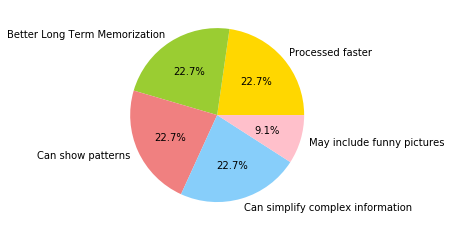

In [6]:
# we use matplotlib for the creation of visualizations
import matplotlib.pyplot as plt
%matplotlib inline

# Data to plot
labels = ['Processed faster', 'Better Long Term Memorization',
          'Can show patterns', 'Can simplify complex information',
          'May include funny pictures']
sizes = [25, 25, 25, 25, 10]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'pink']

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

There are several advantages of visulization in comparison to other forms of showing data, e.g., tables and descriptive statistics. In general, we are faster at processing visual information. Thus, we can understand more about data in the same amount of time. Moreover, most people are better at memorizing visual information than, e.g., text. From personal anecdotocal and certainly that was certainly not obtained using any scientific method, I believe this is certainly true for the students. In exams, I have seen many solutions where the shape of a diagram was correctly drawn from memory, but the annotations, i.e., the associated textual data was wrong or missing. 

However, the advantages of visualizations go beyond processing speed and memorization. Visualization may also lead to understand that would otherwise be very hard to obtain, e.g., about patterns within data of complex relationships. 

Consider the following example. Alice knows Bob and Dan, Dan knows Bob, Bob knows Carol and Alice, Carol knows Alice, Bob, and Dan. The prior sentence is quite complex, hard to follow, and you do not get an intuitive understand of the relationship between Alice and Bob. Now the sentence as a visualization using a directed graph.

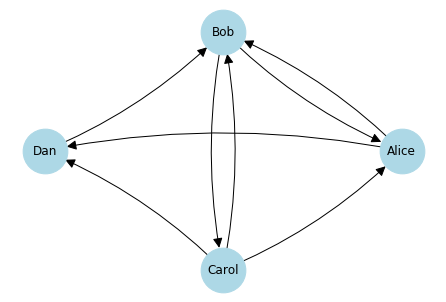

In [7]:
import networkx as nx  # networkx is a powerful library for working with graphs

# Create the graph
graph = nx.DiGraph()
graph.add_edge('Alice', 'Bob')
graph.add_edge('Alice', 'Dan')
graph.add_edge('Dan', 'Bob')
graph.add_edge('Bob', 'Carol')
graph.add_edge('Bob', 'Alice')
graph.add_edge('Carol', 'Alice')
graph.add_edge('Carol', 'Bob')
graph.add_edge('Carol', 'Dan')

# Plot the graph with a shell layout
nx.draw_shell(graph, with_labels=True, node_size=2000, node_color='lightblue',
              arrowsize=20, connectionstyle='arc3, rad = 0.1')

The graph is easy to read and gives us an intuitive understanding of the relationship between the four actors. Please note that for this - and all other graphs in this chapter - we leave out legends, detailed styling, etc. Instead, we create the graphs with minimal code such that they allow us to get the insights we want. This is because we consider visualization as a tool for data exploration. If we would consider visualization in general, especially how you should create graphs that should be used in written text (books, scientific publications, student thesis), other aspects would also be relevant, e.g., consistent font types and sizes, consistent coloring, legends, and titles.

### Anscombe's Quartet

Anscombe's quartet is a famous example for how statistical values may be misleading. The example is based on four different sets of data $(x_1, y_1), ..., (x_4, y_4)$ where with 11 values and for two variables $x_i$ and $y_i$, $i=1, ..., 4$.

| $x_{1,2,3}$ | $y_1$ | $y_2$ | $y_3$ | $x_4$ | $y_4$ |
|-------------|-------|-------|-------|-------|-------|
| 10          | 8.04  | 9.14  | 7.46  | 8     | 6.58  |
| 8           | 6.95  | 8.14  | 6.77  | 8     | 5.76  |
| 13          | 7.58  | 8.74  | 12.74 | 8     | 7.71  |
| 9           | 8.81  | 8.77  | 7.11  | 8     | 8.84  |
| 11          | 8.33  | 9.26  | 7.81  | 8     | 8.47  |
| 14          | 9.96  | 8.10  | 8.84  | 8     | 7.04  |
| 6           | 7.24  | 6.13  | 6.08  | 8     | 5.25  |
| 4           | 4.26  | 3.10  | 5.39  | 19    | 12.50 |
| 12          | 10.84 | 9.13  | 8.15  | 8     | 5.56  |
| 7           | 4.82  | 7.26  | 6.42  | 8     | 7.91  |
| 5           | 5.68  | 4.74  | 5.73  | 8     | 6.89  |

When we look at the data with descriptive statistics, they look very similar. 

In [8]:
import numpy as np  # we now also need numpy, the commonly used numerics libarary for Python

x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]) # same for x1, x2, and x3
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96,
               7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26,
               8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81,
               8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04,
               5.25, 12.50, 5.56, 7.91, 6.89])


print('arithmetic mean of x (same for x1, x2, x3), x4')
print(statistics.mean(x))
print(statistics.mean(x4))

print('standard deviation of x (same for x1, x2, x3), x4')
print(statistics.stdev(x))
print(statistics.stdev(x4))

print('arithmetic mean of y1, ..., y4')
print(statistics.mean(y1))
print(statistics.mean(y2))
print(statistics.mean(y3))
print(statistics.mean(y4))

print('standard deviation of y1, ..., y4')
print(statistics.stdev(y1))
print(statistics.stdev(y2))
print(statistics.stdev(y3))
print(statistics.stdev(y4))

arithmetic mean of x (same for x1, x2, x3), x4
9
9
standard deviation of x (same for x1, x2, x3), x4
3.3166247903554
3.3166247903554
arithmetic mean of y1, ..., y4
7.500909090909091
7.500909090909091
7.5
7.500909090909091
standard deviation of y1, ..., y4
2.031568135925815
2.0316567355016177
2.030423601123667
2.0305785113876023


The data even shares more similarities. If we were to fit a linear regression (Chapter 8) of $y_i$ using $x_i$, we would always find the same regression line, i.e. $y=3+0.5\cdot x$. Thus, from a statistical point of view the four data sets may be interpreted as similar. However, when we visualize the data with a simple pair-plot, we see that this is not the case. 

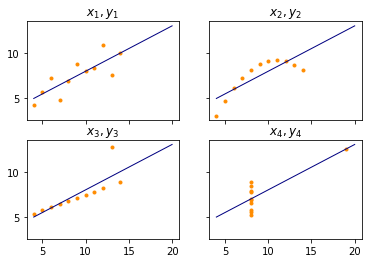

In [9]:
xfit = np.array([4, 20])
yfit = 3+0.5*xfit

f, axes = plt.subplots(2, 2, sharey=True, sharex=True)
axes[0, 0].plot(x, y1, color='darkorange', marker='.', linestyle='none')
axes[0, 0].plot(xfit, yfit, color='navy', lw=1)
axes[0, 0].set_title('$x_1, y_1$')
axes[0, 1].plot(x, y2, color='darkorange', marker='.', linestyle='none')
axes[0, 1].plot(xfit, yfit, color='navy', lw=1)
axes[0, 1].set_title('$x_2, y_2$')
axes[1, 0].plot(x, y3, color='darkorange', marker='.', linestyle='none')
axes[1, 0].plot(xfit, yfit, color='navy', lw=1)
axes[1, 0].set_title('$x_3, y_3$')
axes[1, 1].plot(x4, y4, color='darkorange', marker='.', linestyle='none')
axes[1, 1].plot(xfit, yfit, color='navy', lw=1)
axes[1, 1].set_title('$x_4, y_4$')
plt.show()

The orange points show the location of the data, the blue line shows the regression line for $y=3+0.5\cdot x$ which is optimal for the data. From the statistics, one may expect the data to look like $x_1$, $y_1$, i.e., data with a fairly linear relationship. This means that both $x_1$ and $y_1$ change relatively regularly in form of a line. How how the statistics can be misleading, as they may also be the result for other data. The pair $x_2$, $y_2$ shows something that looks a lot like an inverse parabola. The pair $x_3$, $y_3$ is actually perfectly linear, but with one outlier which skews the regression line. The pair $x_4$, $y_4$ is even worse. $x_4$ is actually constant with one exception. 

The example demonstrates how descriptive statistics about data can be misleading and should be used with care. However, the more statistical markers are used, the less likely it is that the results are misleading. The critical reader may also complain that at least $y_3$ and $x_4$ have outliers and that the arithmetic mean and the standard deviations are not good criteria anyways. However, the problem is generic can there are many more examples, also for more statistical markers, as the work by [Matejka and Fitzmaurice](https://doi.org/10.1145/3025453.3025912) demonstrates. 

### Single Features

The basic analysis of data is that of the distribution of single features within your data to understand how the values of the feature are distributed, similar to the analysis of single features with descriptive statistics. We look at single features with histograms, density plots, rugs, and box plots. 

In the following, we will do this for a features from the [Boston housing data](), a dataset about house prices in Boston from that was initially published in 1978. The description of the data is the following. 

In [10]:
from sklearn import datasets
from textwrap import wrap
from pprint import pprint

boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The above description is an example of metadata, in this case the documentation of the data we are using. We now take a closer look at the feature MEDV, the median value of owner-occupied homes in $1000's. *Histograms* are a simple and effective way to learn about the distribution of data.

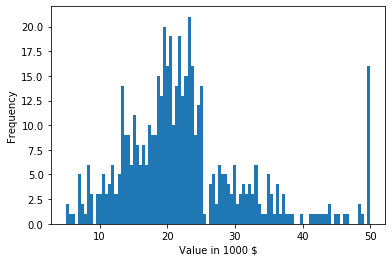

In [11]:
plt.figure()
plt.hist(boston.target, bins=100)
plt.xlabel('Value in 1000 $')
plt.ylabel('Frequency')
plt.show()

The histogram visualizes how much data is in each region of the data. For this, *bins* are created and the histogram shows how many instance are in each bin. The above example shows the how many instance are in each of the 100 bins. The histogram tells us a lot about the data. 

- The values less than 30 seem to follow data seems to follow a normal distribution. This is indicated by the bell-shape of the histogram. The mean value of this normal distribution is somewhere around 22. This can be estimated by look at there the peak of the histogram is located, i.e., where the most values are. The standard deviation is likely somewhere between 7 and 11. Such a rough estimate of the standard deviation can be obtained using the 68-95-99.7 we discussed [above](#Variability). 
- A lot of values are at the at the largest bin on the right side of the plot, i.e., exactly at 50. This indicates that all values larger than 50 were set to exactly 50. Thus, while the numeric value is 50, the actual meaning is greater or equal to 50. 
- There seems to be a long tail of data on the right side of the plot, i.e., there are expensive homes of all prices, but not many. Such a long tail on the right side of a plot is also called *right skew* or *positive skew*. 

Another way to look at a single feature is to use a *density plot*. 

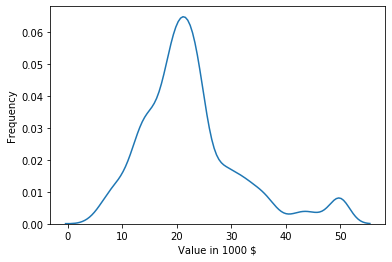

In [12]:
import seaborn as sns  # seaborn is a visualization libary build on top of matplotlib

plt.figure()
sns.distplot(boston.target, hist=False)
plt.xlabel('Value in 1000 $')
plt.ylabel('Frequency')
plt.show()

The density plot shows an estimate of the probability density function of the distribution of the feature. While it is a bit of a simplification, you can think of the density plot as a continuous histogram. An advantage of the density plot over the histogram is that it is often easier to see the distribution of the data. In the example above, the bell-shape is clearer than in the histogram. Thus, it is easier to see that the data is mostly normal. However, density plots also have two disadvantages in comparison to histograms. The smaller disadvantage is that y-axis is less meaningful. In the histogram, you can directly see the counts, i.e. how many instances in your data fall into a bin. The density plot shows hows a frequency that is somewhere between 0.0 and 1.0. This is more or less the fraction of the data, that is located at any specific point at the x-axis. 

The second disadvantage of density plots is bigger. The histogram clearly shows the strange behavior of the data at the value 50. In the density plot, there is only a small peak that looks like there may be another normal distribution with less data and a mean value of 50. This is misleading and hides what is actually happening in the data. This is always a risk with density plots and it cannot be avoided, due to the way density plots are created. Such misrepresentations of the data are more likely if the data is less dense and at the boundary of the range in the data. Often, the density function even goes slightly beyond the range of the data. 

> Note:
>
> Density plots are created using a *kernel density function*, often the normal distribution. This density function is fit to each value of the data with a certain scaling parameter and bandwidth. Then, the values of all these kernel densities are summed up to create the density plot. This explains the problems at the boundaries: the kernel density function fit to the highest data point has to go beyond the range of the data, given that it is a normal distribution with a positive variance. And if there is strange behavior, e.g., due to a many values being exactly the same at the boundary, this is hidden by the scaling parameter. 

A simple why to avoid the problem that density plots may indicate that there is data, where there is not actually data (e.g., beyond the range of the actual data, is to use a *rug*. 

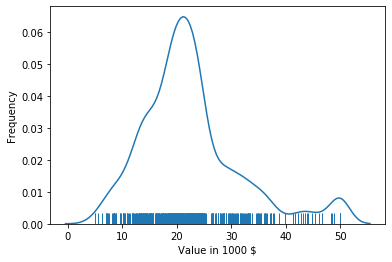

In [13]:
plt.figure()
sns.distplot(boston.target, hist=False, rug=True)
plt.xlabel('Value in 1000 $')
plt.ylabel('Frequency')
plt.show()

The rug shows where data points are located. In combination with the density plot, we can now see that there is no data less than 5 and greater than 50, even though the density plot indicates this. We also see that the data between 38 and 50 is relatively sparse and the rug looks almost uniform, which matches that the density plot almost looks like a line in that region - with the exception of the bump at 50. Thus, the rug gives us more information and we can avoid misinterpretations of the density plots. 

Another effective way to look at a single feature is just to combine the approaches above: visualize the histogram, the density plot, and the rug together. 

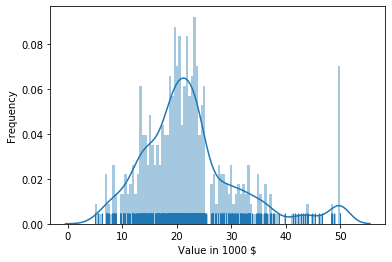

In [14]:
plt.figure()
sns.distplot(boston.target, rug=True, bins=100)
plt.xlabel('Value in 1000 $')
plt.ylabel('Frequency')
plt.show()

With that plot we can see where the data is located and how much data we have in each bin, we get a nice visualization of the probability density function, and we see the actual location of the data in the rug. Thus, we have all advantages of both the histogram and the density plot. The only (minor) drawback is that the histogram is a bit different than the one above: However, the histogram is a bit different than the one above: it shows us the frequency as the percentage of the overall data that falls within in a bin. The reason for this is that this is the same scale on the y-axis as for the density plot. Thus, we lose the information of the counts of the values within each bin. If this is relevant, a normal histogram should be used. 

The feature MEDV that we considered above is relatively "well-behaved", i.e., mostly normal with a tail on the right side. The only problem with that feature is the grouping at 50, which can lead to problems with certain modeling approaches. Now we take a closer look at another feature from the Boston housing data: CRIM, which is defined as the per capita crime rate by town.

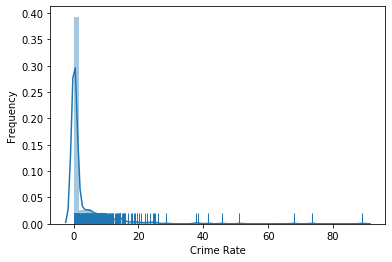

In [15]:
plt.figure()
sns.distplot(boston.data[:, 0], rug=True)
plt.xlabel('Crime Rate')
plt.ylabel('Frequency')
plt.show()

The plot shows that most data is very close to 0, but there is also data for almost all values up to 15, after which the data gets sparse, with some very high outliers. However, we cannot see what happens around 0, because the data is too dense. This indicates that the data *may* be exponentially distributed. Thus, there is a simple trick to solve this: use the logarithm. Instead of plotting the data directly, we plot $\log(x+1)$. The addition of one is a smoothing factor also known as *Laplace smoothing*. Through the smoothing factor we avoid the problem that the logarithm of 0 is undefined. Moreover, because $\log(1) = 0$, it trivially follows that $\log(0+1)=0$, i.e., the zero in the without the logarithm is actually mapped to the zero if Laplace smoothing is used. 

> **Note:**
>
> Laplace smoothing is actually a bit more generic than just adding one and can also mean adding other values. The variant above is, therefore, also called *add-one smoothing*. The use of this smoothing is so common, that numpy has functions log1p for applying the natural logarithm with Laplace smoothing and exp1m for inverting the operation. 

No let us look the the logarithm of the crime rate. 

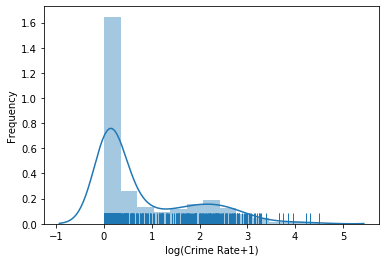

In [16]:
plt.figure()
sns.distplot(np.log1p(boston.data[:, 0]), rug=True)
plt.xlabel('log(Crime Rate+1)')
plt.ylabel('Frequency')
plt.show()

We now see more about the crime rate. From the above plot we learn the following.

- About 80% of the areas are nearly without crime, i.e., crime rates close to zero. That most data is close to zero was already visible without the logarithm, but the ratio is now much clearer and can be seen in the frequency of the density plot. Moreover, the drop of the crime rate from 0 to larger values up to 1 roughly looks like the right side of the bell-shape of a normal distribution.
- The remaining 20% of the areas seem to a have a *lognormal* distributed crime rate. A distribution is called log lognormal, if it looks normal when the logarithm is used. This seems to be the case here. The plot looks normal starting for values greater than 1 with a mean value of around 2.2 and a relatively large standard deviation, i.e., the distribution is spread out. Please note that this is the mean value *after* the logarithm is applied, i.e., we need to invert the logarithm using the exponential function to see what this means for the actual values. Thus, the lognormal part starts at $e^1-1 \approx 1.7$ in the data without the logarithm and the central tendency is at $e^{2.2}-1$. We can even take a closer look at this part of the data, if we just cut of the crime rates less than 1.7 and see that this analysis is correct. 

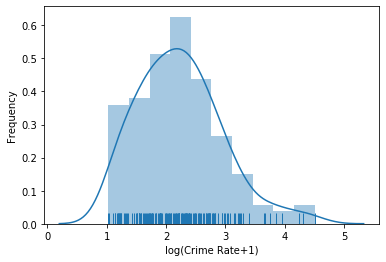

In [17]:
plt.figure()
sns.distplot(np.log1p(boston.data[boston.data[:, 0] >= 1.7, 0]), rug=True)
plt.xlabel('log(Crime Rate+1)')
plt.ylabel('Frequency')
plt.show()

We now use a different data set than Boston, because it is better suited to demonstrate the following plots. The data we now use is called the Iris data. 

In [18]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

The Iris data has four features about the sepals and petals of the plants and the information to which kind of iris each instance in the data belong, i.e., if it is a Setosa, Versicolour, or Virginica. We now look at the data about sepals and petals with a *boxplot*. 

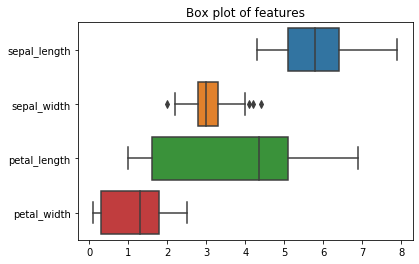

In [19]:
import pandas as pd  # pandas is a powerful library for working with data

# we need that data as dataframe for the pairplot feature of seaborn
iris_df = pd.DataFrame(iris.data, columns=[
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

plt.figure()
plt.title('Box plot of features')
sns.boxplot(data=iris_df, orient='h')
plt.show()

A boxplot consists of a box, to which to lines are attached, the whiskers. The plots are also known as Box-Whisker plots. The boundaries of the box are the lower quartile $Q_{lower}$ and the upper quartile $Q_{upper}$. It follows that the length of the box is the interquartile range. Within the box, there is a line. The line marks the median of the data. The whiskers are attached to the box. The definition of the length of the whiskers is not straightforward. The end of the lower whisker is the smallest instance of the data, where the value is greater than $Q_{lower}-1.5\cdot IQR$. The end of the upper whisker is similarly defined as the the largest value that is less than $Q_{upper}+1.5\cdot IQR$. The idea behind the whiskers is that every value that is more than 1.5 times the IQR away from the quartiles is considered an outlier. Thus, the whiskers show the range of the data without outliers. If there are outliers, each outlier is depicted as a point, as can be seen in the boxplot of the sepal width. 

From this definition of the boxplot, we now know what we see: a visualization of the non-parametric descriptive statistics of the data. Interestings asepcts of boxes are, e.g., the following. 

- The locations of the boxes, i.e., in which range is most of the data located.
- The length of the boxes, i.e., how spread out is the central data.
- The length of the whiskers, i.e., the range of the overall data.
- How many outliers exist and where they are located, e.g., if they are extreme outliers are relatively close to the whiskers. 
- If the median is in the mid of the box or if the median is closer to one of the quartiles. Together with the lengths of each whisker, this can be be used as an indicate for skew in the data. 

We can learn a lot about the Iris data from the boxplot, e.g., the following.

- The features do not have the same ranges. The range of the petal length is about twice the range of the sepal width and the petal width, and also larger than the sepal length. 
- There are only few outliers in the data. The only outliers are for the sepal width. These outliers are likely not because they are really far away from the data, but rather due to the low IQR, i.e., because the center of the data is very dense. Consequently, 1.5 times the IQR is only a very short range. That this is indeed the case is even more likely, because the outliers are very close to the whiskers. 

As you can see, the information from boxplots is different from the information we get through histograms and density plots. Histograms and density plots tell us about the actual probability distribution of the data. We can get deep insights into single features from them. With boxplots, we also look at single featuers, but the focus is on general statistic properties. Through a boxplot of multiple features, we can better compare them statistically, e.g., if they have similar ranges, as well as get a general overview of the data in a single figure. 

### Relationships between Features

So far, we have analyzed features on their own. With the boxplot, we already looked at multiple features at once, but each box was still only for information from a single feature. Boxplots can, to a limited degree, also be used to get insights into the relationships of features, in case one feature is categorical. For example, we use a boxplot to visualize the petal lengths of the different species of iris. 

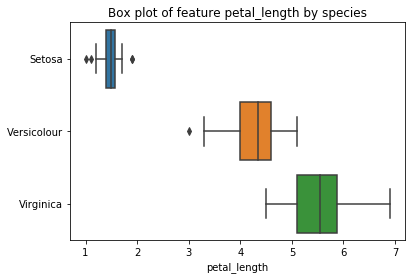

In [20]:
plt.figure()
plt.title('Box plot of feature petal_length by species')
sns.boxplot(x=iris_df['petal_length'], y=iris.target, orient='h')
plt.yticks((0,1,2), ('Setosa', 'Versicolour', 'Virginica'))
plt.show()

This boxplot tells us a lot about the relationship between the petal length and the species. 

- All setosas have a petal length less than 2.5, all other iris species have petal lengths of at least 2.5. 
- Virginicas have a petal length of at least 4.3, hence, all iris with a petal length between 2.5 and 4.3 must be versicolour. 
- The petal length of versicolour are all less than 5.1, hence, all iris with a petal length greater than 5.1 must be virginica. 
- In the range 4.3 to 5.1 the plans can be either versicolour or virginica. 

The drawback of boxplots is that they restrict the comparison to a few statistical markers. Moreover, the relation between features can only be analyzed if one of the features is categorical, ideally also with not too many categories. We can get a more detailed view about the relationship between features with a *pair-wise scatterplot*.

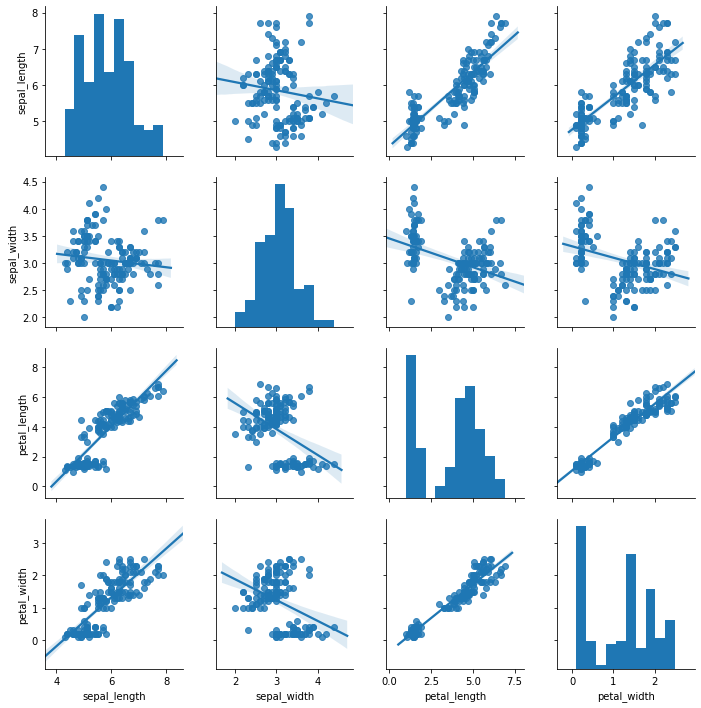

In [21]:
sns.pairplot(iris_df, kind='reg')
plt.show()

As you can see, the pair-wise scatterplot is not a single plot, but a collection of plots that is organized as a matrix. The diagonal of the matrix are histograms of the features. The other plots show the relationship between two features. Each point in the plots represents one instance The lines represent how a linear regression would be fit to the data. If the points are close to the line, this means a linear relationship, if they are spread out, the relationship is not linear. If the slope of the line is negative (downwards), the correlation between the data is negative, if the slope is positive (upwards), the correlation is positive. The values on the x-axis are for the feature defined at the very bottom of the visualization, the values on the y-axis are for the feature defined on the very left of the visualization. For example, the second plot in the first row shows the relationship between the sepal width on the x-axis and the sepal length on the y-axis. 

From the above plot, we can learn both about the individual features through the histogram, as well as the pairwise relationships between the features. Here are some examples for what we can learn. 

- The sepal width seems to follow a normal distribution, the petal length looks like a mixture of two normal distributions. 
- The relationship between sepal width and sepal length looks fairly random. This is indicated because the points a spread about nearly the whole area of the plot. 
- The relationship between petal length and petal width seems to be a positive correlation, i.e., if the petal widths increases, the petal length also increases (positive correlation). Moreover, the correlation seems to be linear (data very close to the line), which means that if the petal length increases by, e.g., 10%, the petal width also increases by 10%. 
- There are two groups of data that we can clearly see in the plot of the petal length and the petal width: on group with less points is at the bottom left of the plot, another group with more points is at the top-right of the plot. Similar groups can be found at different locations in nearly all plots. 

> Note:
>
> We do not discuss correlation in detail. The general concept is quite simple. We say that two features X and Y are positively correlated, if X usually increases, if Y increases. The more often this is the case, the stronger the correlation. Vice versa, we say that X and Y are negatively correlated, if X usually decreases, if Y increases. A linear correlation implies that this relationship in the increase is regular such that $X \approx a+b\cdot B$ for two constants $a, b \in \mathbb{R}$. *Correlation coefficients* are measures for the correlation with values in the interval $[-1, 1]$, where 0 is no correlation and the closer the value comes to 1/-1, the stronger the positive/negative correlation.

Categorical variables like the type of iris can be used to enhance the pair-wise plots by encoding the categories as colors. Moreover, we can also show density plots instead of histograms on the diagonal. 

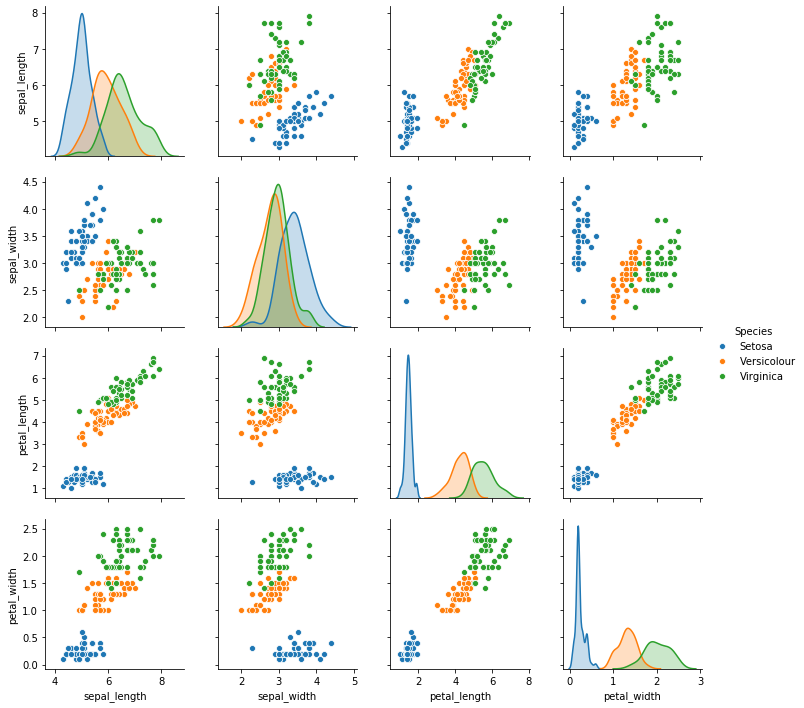

In [22]:
iris_df['Species'] = iris.target
iris_df.loc[iris_df['Species']==0, 'Species'] = 'Setosa'
iris_df.loc[iris_df['Species']==1, 'Species'] = 'Versicolour'
iris_df.loc[iris_df['Species']==2, 'Species'] = 'Virginica'
sns.pairplot(iris_df, hue='Species')
plt.show()

We now see that the group in the bottom left corner is the species setosa. The other group are the versicolour and virginicas and we observe a similar separation between the species, as we did in the boxplot. We also see that it is difficult to separate the species using the data about the sepals, but that an almost perfect separation between the species would is possible if the data about petals is used. 

Scatterplots can be problematic, if you have lots of data points that are dense, i.e., many data points in a small area. When such data is visualized in a scatterplot, we only see one big colored region

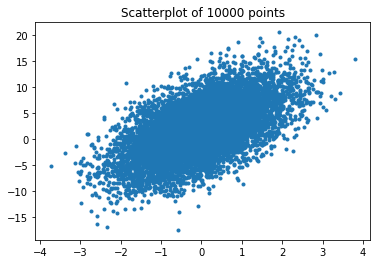

In [30]:
np.random.seed(0)
n = 10000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

plt.figure()
plt.title('Scatterplot of 10000 points')
plt.plot(x, y, marker='.', linestyle='none')
plt.show()

The problem with the overlapping data in the dense region is that we do not see the structure of the data anymore. For example, the data in the region could be uniform, normal, a mixture of distributions with multiple spikes, or more or less any other distribution. Thus, we loose a lot of information. There are two ways to deal with this. The simplest way is to just make the points of the scatterplot transparent.

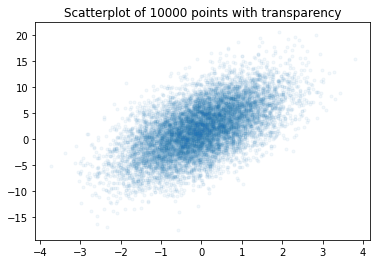

In [31]:
plt.figure()
plt.title('Scatterplot of 10000 points with transparency')
plt.plot(x, y, marker='.', linestyle='none', alpha=0.05)
plt.show()

We can now see the structure of the data again and observe that the data is likely normal with the mean value in the the middle of the dense region. The drawback of the transparency solution is that we still do not see how much data is actually located in any region, because we do not have a real color scale. This can be achieved with a hexbin plot. 

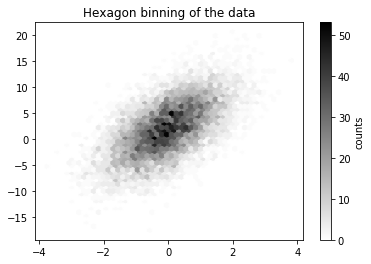

In [32]:
plt.figure()
plt.title("Hexagon binning of the data")
plt.hexbin(x, y, gridsize=50, cmap='binary')
cb = plt.colorbar()
cb.set_label('counts')
plt.show()

The hexbin plot is more ore less a two-dimensional histogram. The area is split into hexagons (i.e., our bins) and the plot shows using a color scale how much data falls into each hexagon. Now we not only see the structure of the data, but can also say how much data is located in every region of the data. 

Before we finish the exploration of the relationship between features, we take another look at correlations. We already briefly discussed that we can observe correlations between features in scatterplots, especially if we add regression lines. However, this approach does not scale well when it comes to the identification of correlations. If we have many features, the number of pair-wise plots we would have to analyze increases quadratically. A more efficient way to get a general overview of correlations is a *correlation heatmap*. 

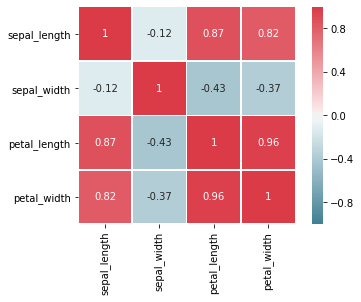

In [23]:
# Compute the correlation matrix that contains the correlation coefficients
corr = iris_df.corr()

# we use customized colors
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, square=True, linewidths=.5, 
            vmin=-1.0, vmax=1.0, cmap=cmap, annot=True)
plt.show()

The correlation heatmap visualizes the values of the correlation coefficients between the features. Red means a strong positive correlation, blue means a negative correlation, white means no correlation. The stronger the saturation of the color, the stronger the correlation. The diagonal has a perfect positive correlation, because features are always perfectly correlated with themselves. Moreover, we see that our analysis from the pair-wise plots was correct: there is a very strong positive correlation between the petal length and the petal width. We also see strong negative correlations between the sepal length and the petal length and petal width. Another observation from the pair-wise plots is also confirmed: there is almost no correlation between the sepal length and the sepal width. Finally, we observe a weak negative correlation between the sepal width and the petal length/width.

### Trends over Time

The visualization approaches so far did not consider that instances may be directly related to each other. The most common relationship is a temporal relationship, e.g., because you have a series of measurements over time. We now use a data set about the number of air passengers of US airlines from 1949 to 1960. The data contains monthly values for the number of passengers. 

In [42]:
!head data/AirPassengers.csv

Month,#Passengers
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136


Above, we learned that histograms are a good way to learn about features. Below is a histogram of the number of passengers. 

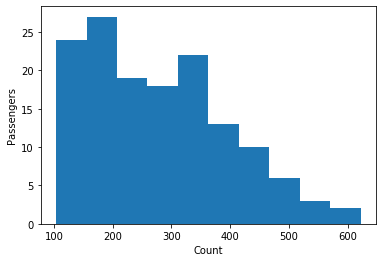

In [37]:
air_passengers_df = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0, squeeze=True)

plt.figure()
plt.hist(air_passengers_df)
plt.xlabel('Count')
plt.ylabel('Passengers')
plt.show()

We can learn something from the histogram, e.g., that there where at most around 600 passengers in a month and that there were about 20 months with between 100 and 350 passengers. However, we have no idea how this data relates to the time. We could just say that we get this if we use a scatterplot with the number of passengers as the y-axis and the month as the x-axis. 

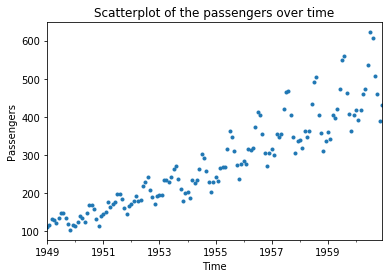

In [40]:
plt.figure()
plt.title("Scatterplot of the passengers over time")
air_passengers_df.plot(linestyle='', marker='.')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

We get more information from this plot. We now see the general rising trend in the data and also observe that the spread in the trend increases over time. However, we still cannot easily see how data changes from one month to the next. For this, we need to - literally - connect the dots. This is called a line plot. 

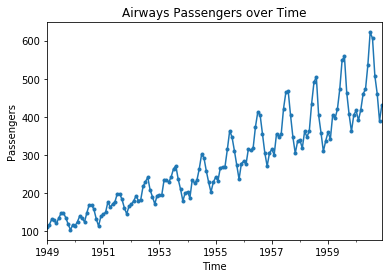

In [41]:
air_passengers_df = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0, squeeze=True)

plt.figure()
plt.title("Airways Passengers over Time")
air_passengers_df.plot(marker='.')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.show()

With the line plot we see the general trend, as well as how the data changes from month to month. Now we also see a regular pattern that repeats every year. 